![image](https://www.livetradingnews.com/wp-content/uploads/2017/01/home-sales-701x526.jpg)
<div style="text-align: center" > A Statistical Analysis & Machine Learning Workflow of House-Pricing </div>

<div style="text-align: center"> Being a part of Kaggle gives me unlimited access to learn, share and grow as a Data Scientist. In this kernel, I want to solve <font color="red"><b>House Pricing with Advanced Regression Analysis</b></font>, a popular machine learning dataset for <b>beginners</b>. I am going to share how I work with a dataset step by step  <b>from data preparation and data analysis to statistical tests and implementing machine learning models.</b> I will also describe the model results along with many other tips. Let's get started.</div>

<div style="text-align:center"> If there are any recommendations/changes you would like to see in this notebook, please <b>leave a comment</b> at the end of this kernel. Any feedback/constructive criticism would be genuinely appreciated. If you like this notebook or find this notebook helpful, Please feel free to <font color="red"><b>UPVOTE</b></font> and/or leave a comment.
 
<div> <b>This notebook is always a work in progress. So, please stay tuned for more to come.</b></div>

# Goals
This kernel hopes to accomplish many goals, to name a few...
*  Learn/review/explain complex data science topics through write-ups. 
* Do a comprehensive data analysis along with visualizations. 
* Create models that are well equipped to predict better sale price of the houses. 

# Introduction
This kernel is the "regression siblings" of my other [ Classification kernel](https://www.kaggle.com/masumrumi/a-statistical-analysis-ml-workflow-of-titanic). As the name suggests, this kernel goes on a detailed analysis journey of most of the regression algorithms.  In addition to that, this kernel uses many charts and images to make things easier for readers to understand.
# 1: Importing Necessary Libraries and datasets

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
                                                                        
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

## Removes warnings. 
import warnings
warnings.filterwarnings('ignore')


import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['sample_submission.csv', 'test.csv', 'data_description.txt', 'train.csv']


# A Glimpse of the datasets.
> **Sample Train Dataset**

In [2]:
## Import Trainning data. 
train = pd.read_csv("../input/train.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


> ** Sample Test Dataset**

In [3]:
## Import test data.
test = pd.read_csv("../input/test.csv")
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
"""## Converting some of the numerical variables which is actually categorical. Except year features since those will be too clutered. 
## the "OverallCond" and "OverallQual" of the house. 
train['OverallCond'] = train['OverallCond'].astype(str) 
train['OverallQual'] = train['OverallQual'].astype(str)

## Important years and months that should be categorical variables not numerical. 
#train['YearBuilt'] = train['YearBuilt'].astype(str)
#train['YearRemodAdd'] = train['YearRemodAdd'].astype(str)
#train['YrSold'] = train['YrSold'].astype(str)
train['MoSold'] = train['MoSold'].astype(str) 
#train['GarageYrBlt'] = train['GarageYrBlt'].astype(str)

## Zoning class are given in numerical; therefore converted to categorical variables. 
train['MSSubClass'] = train['MSSubClass'].astype(str)

import seaborn as sns
import matplotlib.pyplot as plt
# creating barplots for variable with object type and exploring their relation with "SalePrice"
for i in range(len(train.columns)):
    if train[train.columns[i]].dtype == object:
        plt.subplots(figsize = (20,5));
        sns.barplot(y = train["SalePrice"], x = train[train.columns[i]]);
        plt.title("Average Sale Price across {}'s".format((train.columns[i]), y = 1.05, fontsize = 15));
        plt.ylabel("SalePrice");
        plt.xlabel(str(train.columns[i]));
        plt.show();"""

'## Converting some of the numerical variables which is actually categorical. Except year features since those will be too clutered. \n## the "OverallCond" and "OverallQual" of the house. \ntrain[\'OverallCond\'] = train[\'OverallCond\'].astype(str) \ntrain[\'OverallQual\'] = train[\'OverallQual\'].astype(str)\n\n## Important years and months that should be categorical variables not numerical. \n#train[\'YearBuilt\'] = train[\'YearBuilt\'].astype(str)\n#train[\'YearRemodAdd\'] = train[\'YearRemodAdd\'].astype(str)\n#train[\'YrSold\'] = train[\'YrSold\'].astype(str)\ntrain[\'MoSold\'] = train[\'MoSold\'].astype(str) \n#train[\'GarageYrBlt\'] = train[\'GarageYrBlt\'].astype(str)\n\n## Zoning class are given in numerical; therefore converted to categorical variables. \ntrain[\'MSSubClass\'] = train[\'MSSubClass\'].astype(str)\n\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n# creating barplots for variable with object type and exploring their relation with "SalePrice"\nfor i in 

# Describe the Datasets

In [5]:
print ("Total rows and columns in train dataset respectively: " + str(train.shape))
print ("Total rows and columns in test dataset respectively: " + str(test.shape))

Total rows and columns in train dataset respectively: (1460, 81)
Total rows and columns in test dataset respectively: (1459, 80)


If you want to know more about why we are splitting dataset's into train and test, please check out this [kernel](https://www.kaggle.com/masumrumi/a-statistical-analysis-ml-workflow-of-titanic).

In [6]:
# gives us statistical info about the numerical variables. 
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [7]:
## Gives us information about the features. 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [8]:
## Gives use the count of different types of objects.
train.get_dtype_counts()

float64     3
int64      35
object     43
dtype: int64

## Dealing with Missing Values

### Missing Train values

In [9]:
def finding_total_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    ## the two following line may seem complicated but its actually very simple. 
    total = train.isnull().sum().sort_values(ascending = False)[train.isnull().sum().sort_values(ascending = False) != 0]
    percent = round(train.isnull().sum().sort_values(ascending = False)/len(train)*100,2)[round(train.isnull().sum().sort_values(ascending = False)/len(train)*100,2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [10]:
finding_total_percentage(train)

,Total,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageCond,81,5.55
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55


In [11]:
finding_total_percentage(test)

,Total,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageCond,81,5.55
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55


# Observation
* There are multiple types of features. 
* Some features have missing values. 
* Most of the features are object( includes string values in the variable).

I want to focus on the target variable which is **SalePrice.** Let's create a histogram to see if the target variable is Normally distributed. If we want to create any linear model, it is essential that the features are normally distributed. This is one of the assumptions of multiple linear regression. I will explain more on this later.

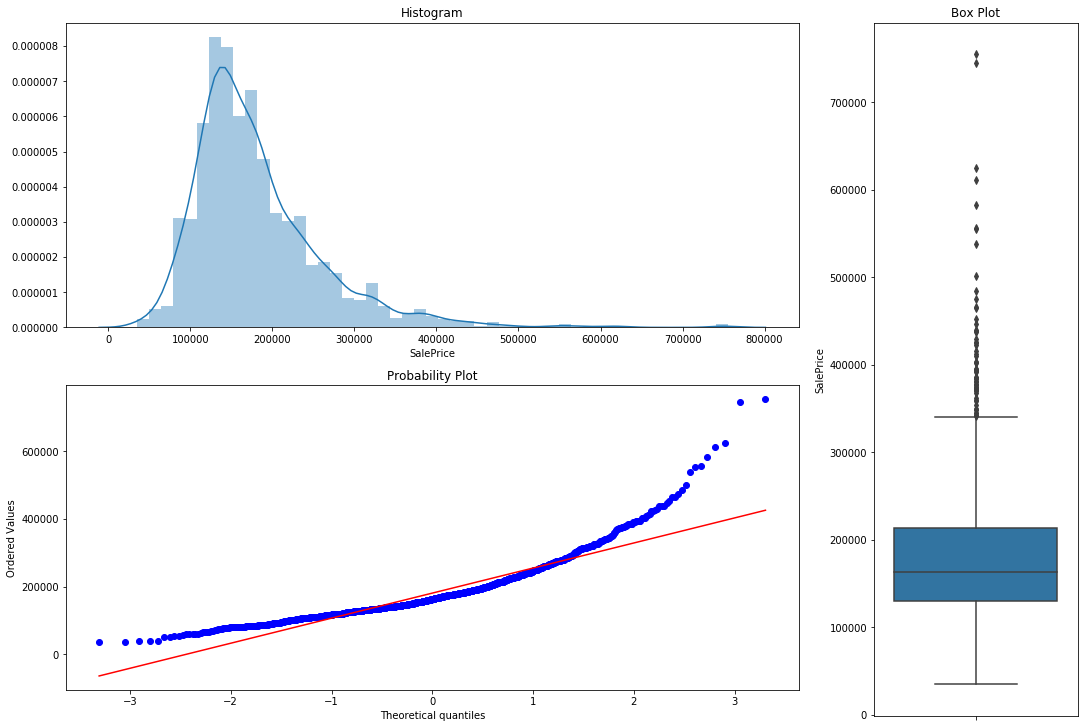

In [12]:
## Importing seaborn, matplotlab and scipy modules. 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy import stats

## Creating a customized chart. and giving in figsize and everything. 
fig = plt.figure(constrained_layout=True, figsize=(15,10))
## creating a grid of 3 cols and 3 rows. 
grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
#gs = fig3.add_gridspec(3, 3)

## Customizing the histogram grid. 
ax1 = fig.add_subplot(grid[0, :2])
## Set the title. 
ax1.set_title('Histogram')
## plot the histogram. 
sns.distplot(train.SalePrice, norm_hist=True, ax = ax1)

# customizing the QQ_plot. 
ax2 = fig.add_subplot(grid[1, :2])
## Set the title. 
ax2.set_title('QQ_plot')
## Plotting the QQ_Plot. 
stats.probplot(train['SalePrice'], plot = ax2)

## Customizing the Box Plot. 
ax3 = fig.add_subplot(grid[:, 2])
## Set title. 
ax3.set_title('Box Plot')
## Plotting the box plot. 
sns.boxplot(train.SalePrice, orient='v', ax = ax3 );

These **three** charts above can tell us a lot about our target variable.
* Our target variable, **SalePrice** is not normally distributed.
* Our target variable is right-skewed. 
* There are multiple outliers in the variable. 


**P.S.** 
* If you want to find out more about how to customize charts, try [this](https://matplotlib.org/tutorials/intermediate/gridspec.html#sphx-glr-tutorials-intermediate-gridspec-py) link. 
* If you are learning about Q-Q-plots for the first time. checkout [this](https://www.youtube.com/watch?v=smJBsZ4YQZw) video. 
* You can also check out [this](https://www.youtube.com/watch?v=9IcaQwQkE9I) one if you have some extra time. 

Let's find out how the sales price is distributed.

In [13]:
#skewness and kurtosis
print("Skewness: " + str(train['SalePrice'].skew()))
print("Kurtosis: " + str(train['SalePrice'].kurt()))

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


It looks like there are quite a bit Skewness and Kurtosis in the target variable if you care to know what that means and why thats important, please keep reading.

<b>Skewness</b> 
* is the degree of distortion from the symmetrical bell curve or the normal curve. 
* So, a symmetrical distribution will have a skewness of "0". 
* There are two types of Skewness: <b>Positive and Negative.</b> 
* <b>Positive Skewness</b>(similar to our target variable distribution) means the tail on the right side of the distribution is longer and fatter. 
* In <b>positive Skewness </b> the mean and median will be greater than the mode. This is similar to this dataset. So, in Layman's terms, more houses were sold by less than the average price. 
* <b>Negative Skewness</b> means the tail on the left side of the distribution is longer and fatter.
* In <b>negative Skewness </b> the mean and median will be less than the mode. 
* Skewness differentiates extreme values in one versus the other tail. 

Here is a picture to make more sense.  
![image](https://cdn-images-1.medium.com/max/1600/1*nj-Ch3AUFmkd0JUSOW_bTQ.jpeg)


<b>Kurtosis</b>
* Is the measure of the extreme values(outliers) present in the distribution. 
* There are three types of Kurtosis: <b>Mesokurtic, Leptokurtic and Platykurtic</b>. 
* Mesokurtic is similar to normal curve with the standard value of 3. This means that the extreme values of this distrubution is similar to that of a normal distribution. 
* Leptokurtic Example of leptokurtic distributions are the T-distributions with small degrees of freedom.


You can read more in this from [this](https://codeburst.io/2-important-statistics-terms-you-need-to-know-in-data-science-skewness-and-kurtosis-388fef94eeaa) sweet article. 

We can fix this by using different types of transformation(more on this later). However, before doing that, I want to find out the relationships among the target variable and other predictor variables. Let's find out.

In [14]:
## Getting the correlation of all the features with target variable. 
(train.corr()**2)["SalePrice"].sort_values(ascending = False)[1:]

OverallQual      0.625652
GrLivArea        0.502149
GarageCars       0.410124
GarageArea       0.388667
TotalBsmtSF      0.376481
1stFlrSF         0.367057
FullBath         0.314344
TotRmsAbvGrd     0.284860
YearBuilt        0.273422
YearRemodAdd     0.257151
GarageYrBlt      0.236548
MasVnrArea       0.228000
Fireplaces       0.218023
BsmtFinSF1       0.149320
LotFrontage      0.123763
WoodDeckSF       0.105244
2ndFlrSF         0.101974
OpenPorchSF      0.099765
HalfBath         0.080717
LotArea          0.069613
BsmtFullBath     0.051585
BsmtUnfSF        0.046001
BedroomAbvGr     0.028296
KitchenAbvGr     0.018471
EnclosedPorch    0.016532
ScreenPorch      0.012420
PoolArea         0.008538
MSSubClass       0.007104
OverallCond      0.006062
MoSold           0.002156
3SsnPorch        0.001988
YrSold           0.000837
LowQualFinSF     0.000656
Id               0.000480
MiscVal          0.000449
BsmtHalfBath     0.000284
BsmtFinSF2       0.000129
Name: SalePrice, dtype: float64

These are the predictor variables sorted in a descending order starting with the most correlated one **OverallQual**. Let's put this one in a scatter plot and see how it looks.

### SalePrice vs OverallQual

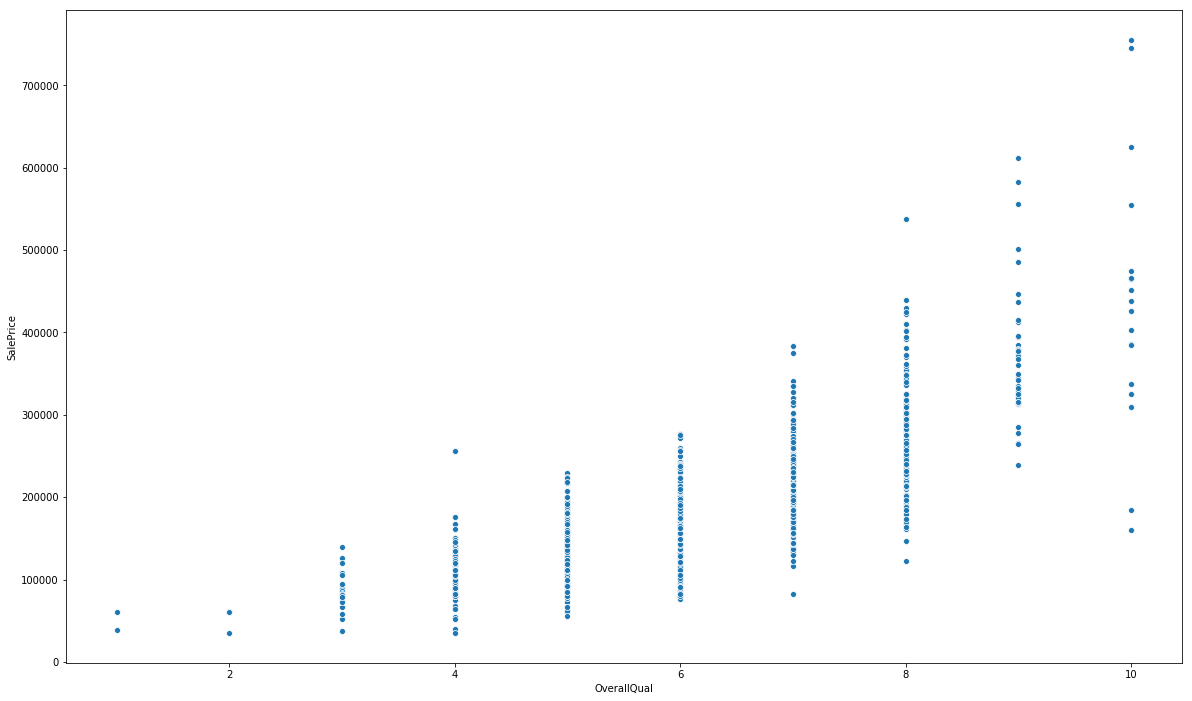

In [15]:
## Sizing the plot. 
plt.subplots(figsize = (20,12))
## Plotting target variable with predictor variable(OverallQual)
sns.scatterplot(y = train.SalePrice, x = train.OverallQual);

In [16]:
train.OverallQual.sort_values(ascending = True)

375      1
533      1
1100     2
916      2
636      2
1090     3
1404     3
620      3
342      3
1045     3
736      3
998      3
1380     3
323      3
74       3
710      3
1000     3
1061     3
88       3
1321     3
968      3
449      3
250      3
1326     3
1186     3
978      4
917      4
223      4
935      4
995      4
        ..
336      9
1305     9
885      9
877      9
527      9
1388     9
803      9
540      9
683      9
278      9
378      9
644      9
58      10
185     10
440     10
691     10
389     10
1243    10
994     10
224     10
591     10
583     10
1373    10
1182    10
825     10
1169    10
523     10
515     10
1442    10
1298    10
Name: OverallQual, Length: 1460, dtype: int64

Clearly, **OverallQual** is a categorical variable and scatter plot is not the best way to visualize categorical variables. However, it looks like some of the houses are overpriced compared to their overall quality. These could be outliers. Let's check out some more features to determine the outliers. Let's focus on the numerical variables this time.

### SalePrice vs GrLivArea

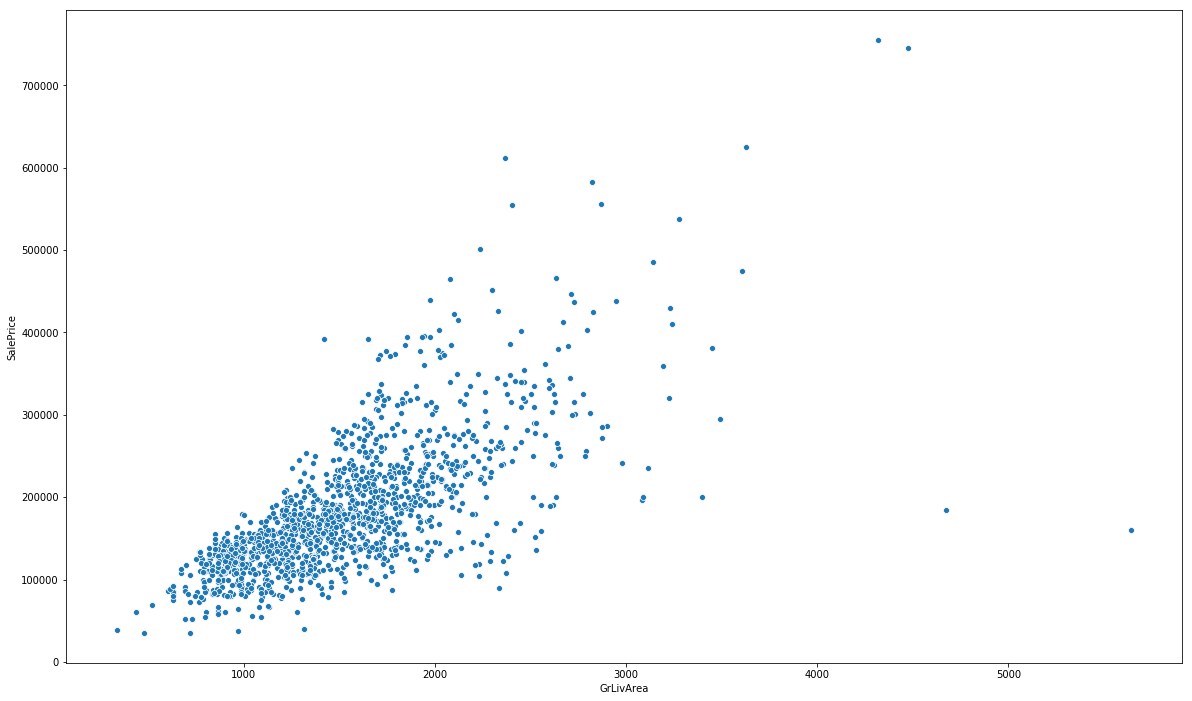

In [17]:
## Sizing the plot. 
plt.subplots(figsize = (20,12))
## Plotting target variable with predictor variable(GrLivArea)
sns.scatterplot(y = train.SalePrice, x = train.GrLivArea);

Let's try to keep a mental picture of each one of these charts as we go on. I will talk about all of them together. How about the next one?

### SalePrice vs GarageArea

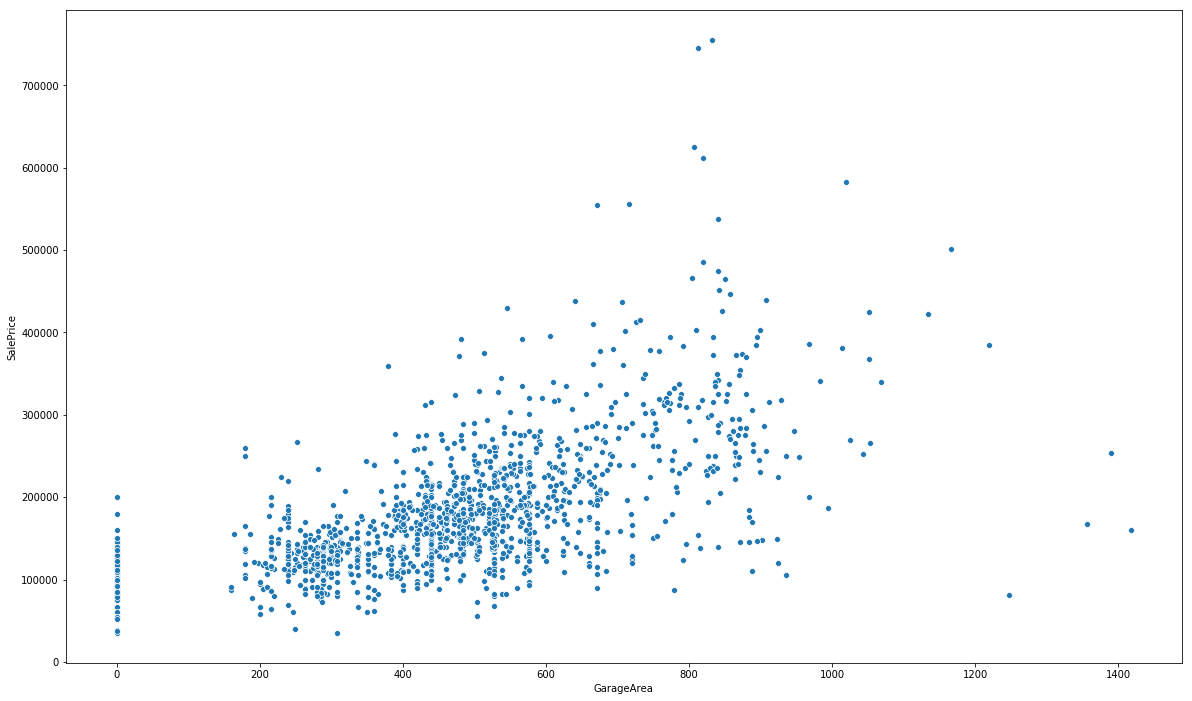

In [18]:
## plot sizing. 
plt.subplots(figsize = (20,12))
## Plotting target variable with predictor variable(GarageArea)
sns.scatterplot(y = train.SalePrice, x = train.GarageArea);

And the next one..?
### SalePrice vs TotalBsmtSF

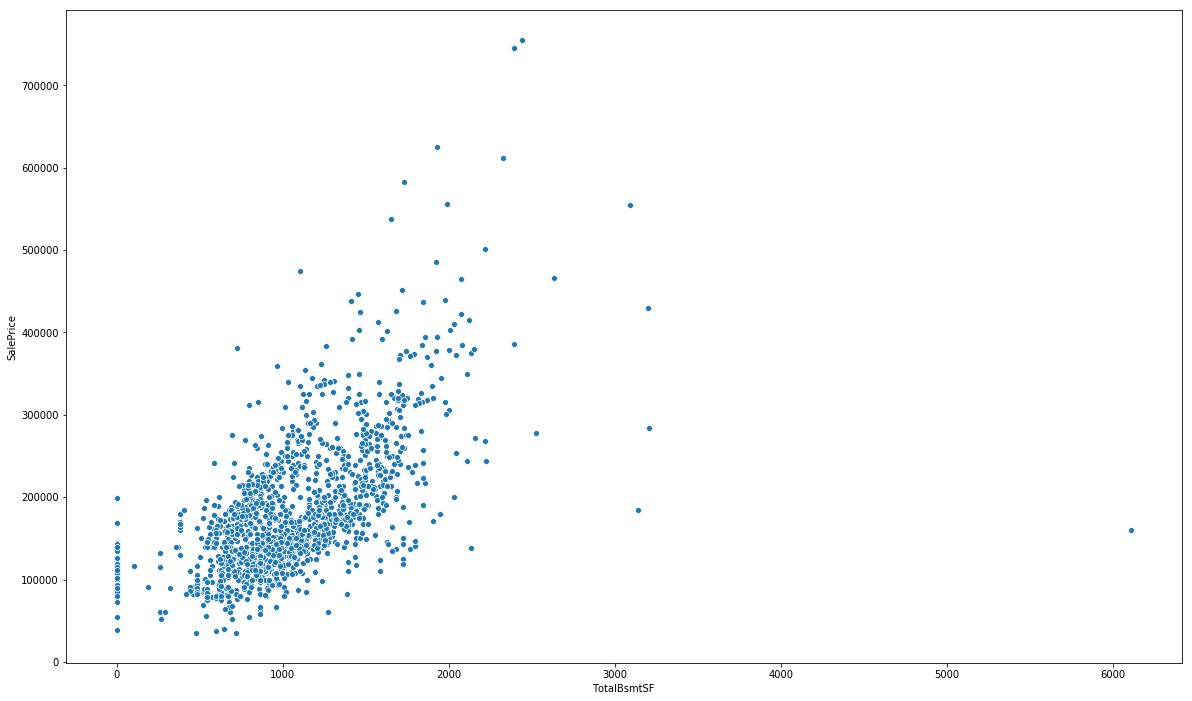

In [19]:
## plot sizing. 
plt.subplots(figsize = (20,12))
## Plotting target variable with predictor variable(TotalBsmtSF)
sns.scatterplot(y = train.SalePrice, x = train.TotalBsmtSF);

and the next ?
### SalePrice vs 1stFlrSF

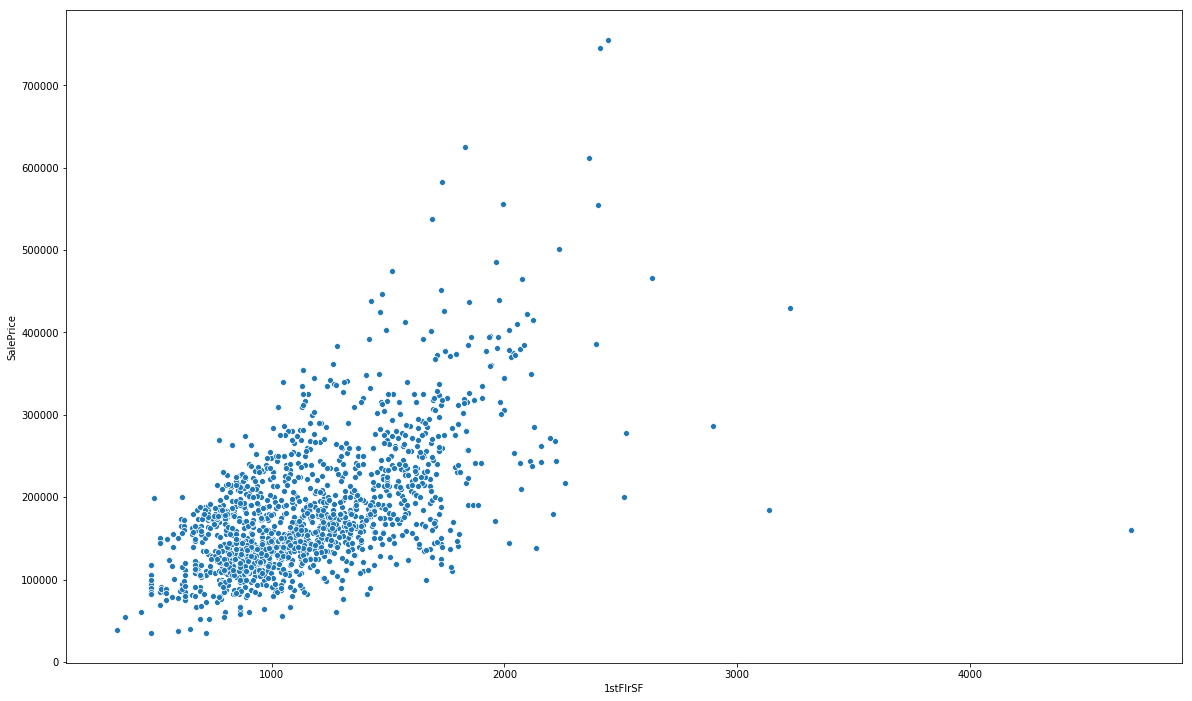

In [20]:
## Plot sizing.
plt.subplots(figsize = (20,12))
## Plotting target variable with predictor variable(1stFlrSF)
sns.scatterplot(y = train.SalePrice, x = train['1stFlrSF']);

How about one more...

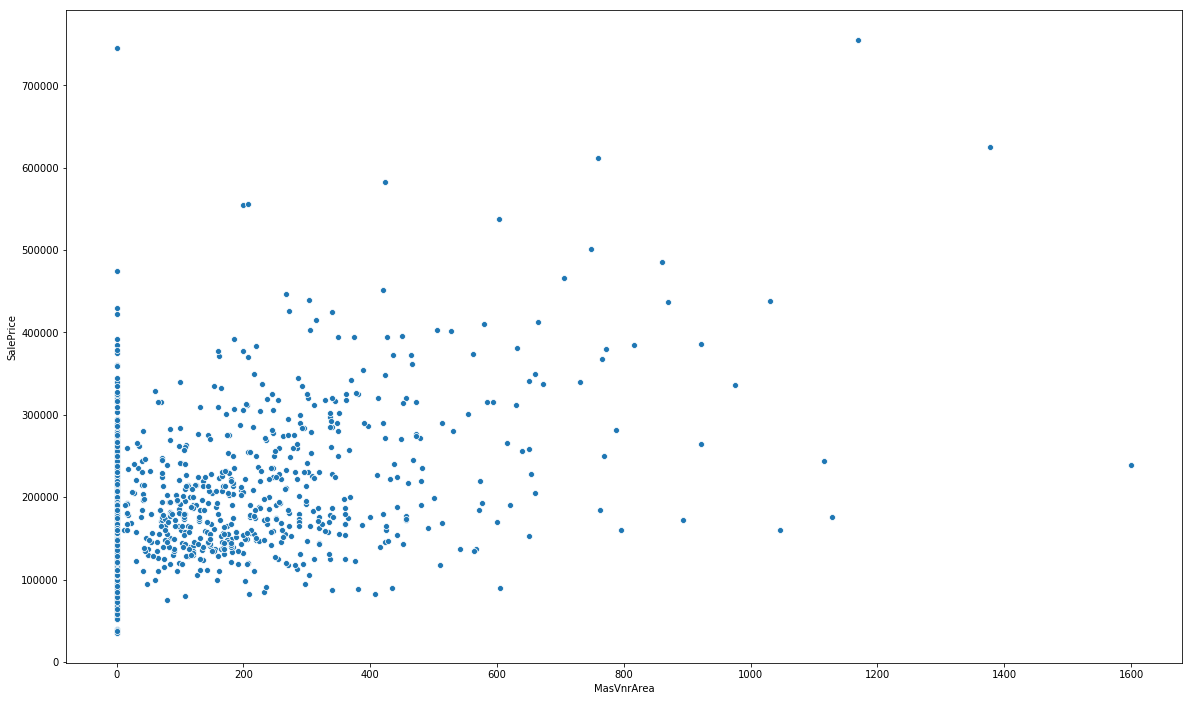

In [21]:
## Plot sizing. 
plt.subplots(figsize = (20,12))
## Plotting target variable with predictor variable(1stFlrSF)
sns.scatterplot(y = train.SalePrice, x = train.MasVnrArea, );

Okay, I think we have seen enough. Let's discuss what we have found so far. 

# Observations
* Our target variable shows an unequal level of variance across most predictor(independent) variable values. This is called **Heteroscedasticity(more explanation below)**; and is a red flag for the multiple linear regression model.
* There are many outliers in the scatter plots above that took my attention. 

* The two next to the top right edge of **SalePrice vs. GrLivArea** seems to follow a trend, which can be explained by saying that "As the prices increased so did the area. 
* However, The two on the bottom right of the same chart do not follow any trends. We will get rid of these two below.

In [22]:
## save a copy of this dataset so that any changes later on can be compared side by side.
previous_train = train.copy()

## Deleting those two values with outliers. 
train.drop(index = train[(train.GrLivArea > 4000) & (train.SalePrice < 300000)].index.tolist(), inplace=True)

As I look through these scatter plots, I realized that it is time to explain the assumptions of Multiple Linear Regression. Before building a multiple linear regression model, we need to check that these assumptions below are valid.
**Linearity.** 
**Multivariate Normality. **
**Homoscedasticity(vs Heteroscedasticity). **
**Independence of Errors. **
**No or little Multicollinearity. ** 
**Linearity: **

Linear regression needs the relationship between the independent and dependent variables to be linear.  It is also imperative to check for outliers since linear regression is sensitive to outlier effects. The linearity assumption can best be tested with scatter plots, the following two examples depict two cases, where no or little linearity is present. The following charts make this topic a bit more clear.

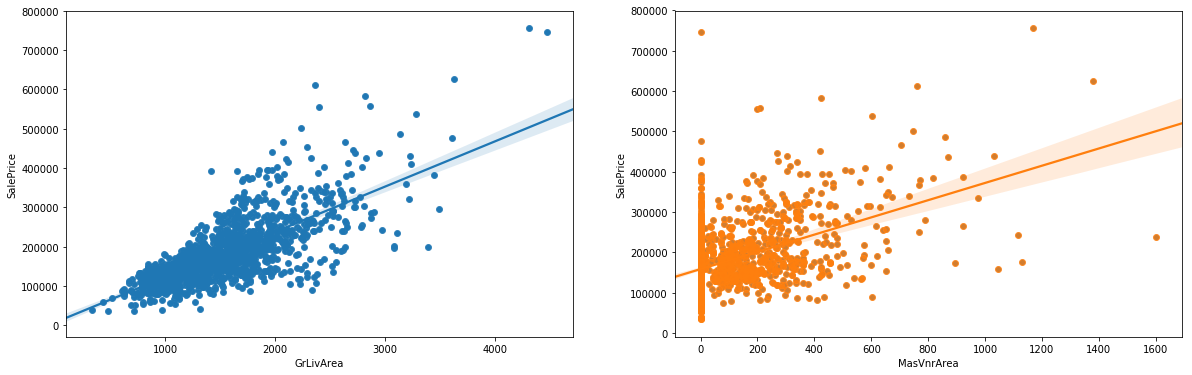

In [23]:
## Plot sizing. 
fig, (ax1, ax2) = plt.subplots(figsize = (20,6), ncols=2,sharey=False)
## Scatter plotting for SalePrice and GrLivArea. 
sns.scatterplot( x = train.GrLivArea, y = train.SalePrice,  ax=ax1)
## Putting a regression line. 
sns.regplot(x=train.GrLivArea, y=train.SalePrice, ax=ax1)

## Scatter plotting for SalePrice and MasVnrArea. 
sns.scatterplot(x = train.MasVnrArea,y = train.SalePrice, ax=ax2)
## regression line for MasVnrArea and SalePrice. 
sns.regplot(x=train.MasVnrArea, y=train.SalePrice, ax=ax2);

Here we are plotting our target variable with two independent variable **GrLivArea** and **MasVnrArea**. It's pretty obvious from the chart that there is a better linear relationship between **SalePrice** and **GrLivArea** than **SalePrice** and **MasVnrArea** 
***

**Multivariate Normality: **
The linear regression analysis requires all variables to be multivariate normally distributed.  A histogram or a Q-Q-Plot can check whether the data is normally distributed or not. Normality can be checked with a goodness of fit test, e.g., the Kolmogorov-Smirnov test.  When the data is not normally distributed, a non-linear transformation (e.g., log-transformation, Box-Cox transformation) might fix this issue. We already know that our target variable does not follow a normal distribution. Let's bring back the three charts that show our target variable.

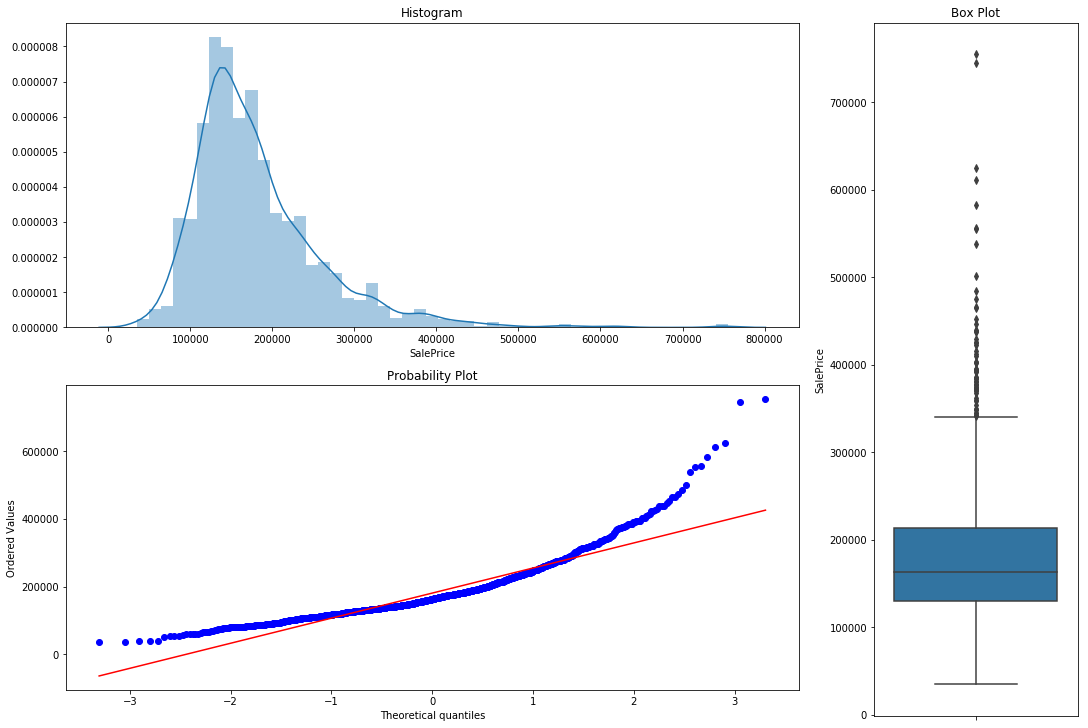

In [24]:
## Creating a customized chart. and giving in figsize and everything. 
fig = plt.figure(constrained_layout=True, figsize=(15,10))
## creating a grid of 3 cols and 3 rows. 
grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
#gs = fig3.add_gridspec(3, 3)

## Customizing the histogram grid. 
ax1 = fig.add_subplot(grid[0, :2])
## Set the title. 
ax1.set_title('Histogram')
## plot the histogram. 
sns.distplot(train.SalePrice, norm_hist=True, ax = ax1)

# customizing the QQ_plot. 
ax2 = fig.add_subplot(grid[1, :2])
## Set the title. 
ax2.set_title('QQ_plot')
## Plotting the QQ_Plot. 
stats.probplot(train['SalePrice'], plot = ax2)

## Customizing the Box Plot. 
ax3 = fig.add_subplot(grid[:, 2])
## Set title. 
ax3.set_title('Box Plot')
## Plotting the box plot. 
sns.boxplot(train.SalePrice, orient='v', ax = ax3 );

Now, let's make sure that the target variable follows a normal distribution. If you want to learn more about probability plot(Q-Q plot), try [this](https://www.youtube.com/watch?v=smJBsZ4YQZw) video. You can also check out [this](https://www.youtube.com/watch?v=9IcaQwQkE9I) one if you have some extra time.

In [25]:
## trainsforming target variable using numpy.log1p, 
train["SalePrice"] = np.log1p(train["SalePrice"])

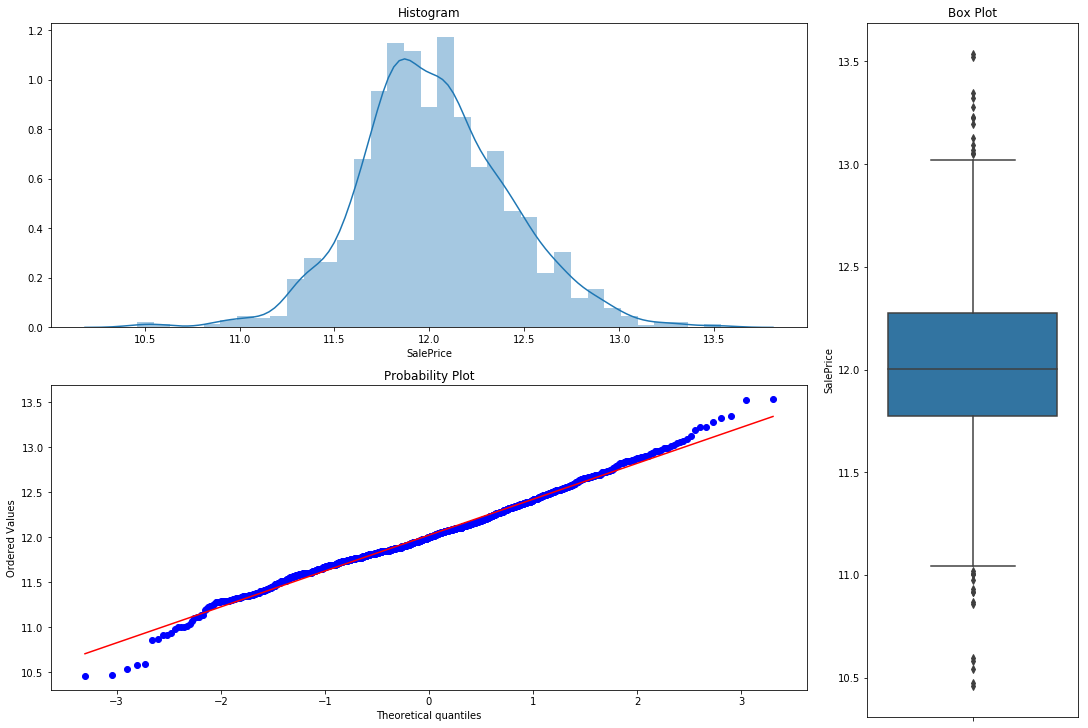

In [26]:
## Creating a customized chart. and giving in figsize and everything. 
fig = plt.figure(constrained_layout=True, figsize=(15,10))
## creating a grid of 3 cols and 3 rows. 
grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
#gs = fig3.add_gridspec(3, 3)

## Customizing the histogram grid. 
ax1 = fig.add_subplot(grid[0, :2])
## Set the title. 
ax1.set_title('Histogram')
## plot the histogram. 
sns.distplot(train.SalePrice, norm_hist=True, ax = ax1)

# customizing the QQ_plot. 
ax2 = fig.add_subplot(grid[1, :2])
## Set the title. 
ax2.set_title('QQ_plot')
## Plotting the QQ_Plot. 
stats.probplot(train['SalePrice'], plot = ax2)

## Customizing the Box Plot. 
ax3 = fig.add_subplot(grid[:, 2])
## Set title. 
ax3.set_title('Box Plot')
## Plotting the box plot. 
sns.boxplot(train.SalePrice, orient='v', ax = ax3 );

Now we see that our target variable looks more normally distributed and all the charts looks symmetrical. We can use this trick to transform other dependent variables that do not follow a Normal distribution.

**Homoscedasticity:** 
The assumption of homoscedasticity is crucial to linear regression models. Homoscedasticity describes a situation in which the error term or variance or the "noise" or random disturbance in the relationship between the independent variables and the dependent variables is same across all values of the independent variables. If the "noise" is not same across the values of an independent variable, we call that **Heteroscedasticity**. As you can tell, it is the opposite of **Homoscedasticity.**

<p><img src="http://www.statisticssolutions.com/wp-content/uploads/2010/01/mlr07.jpg" style="float:left"><img src="http://www.statisticssolutions.com/wp-content/uploads/2010/01/mlr06.jpg" style="float:left ; margin-right :2%; margin-bottom:2%"></p>
<br>

These two pictures are good examples of Heteroscedasticity, and if we see this kind of funnel shape in the data, we ought to transform the data using a transformation method like log-transformation or box-cox transformation. Regarding this kernel, a good example of Heteroskedasticity is the first scatter plot (SalePrice vs. GrLivArea). Before we look at it again, remember we have transformed our **SalePrice** be more like a standard Normal curve and that is one way sometimes we can solve the homoscedasticity problem as well. Let's compare how the transformation changed the target variable by placing charts side by side.

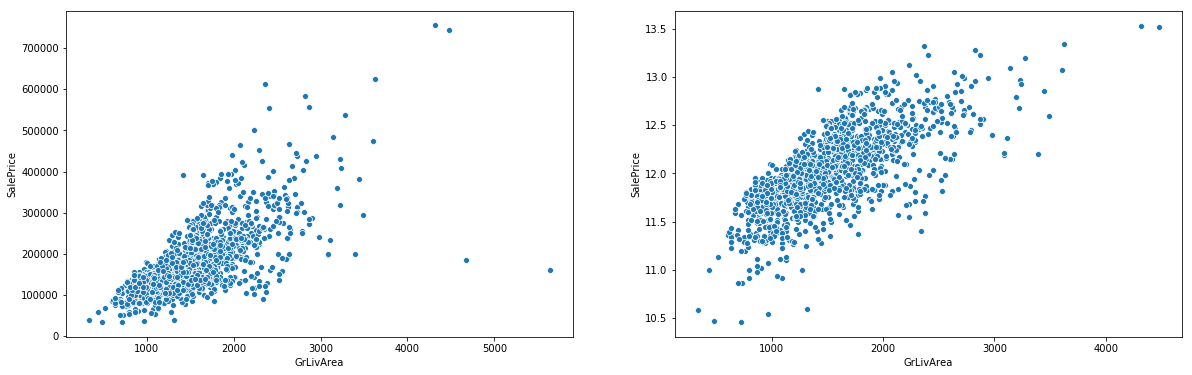

In [27]:
## Customizing grid for two plots. 
fig, (ax1, ax2) = plt.subplots(figsize = (20,6), ncols=2, sharey = False, sharex=False)
## doing the first scatter plot. 
sns.scatterplot(x = previous_train.GrLivArea, y = previous_train.SalePrice, ax = ax1)
## doing the scatter plot for GrLivArea and SalePrice. 
sns.scatterplot(x = train.GrLivArea, y = train.SalePrice, ax = ax2);

Here, you can see that the pre-transformed chart on the left has heteroscedasticity and the post-transformed chart right has an equal amount of variance across the target variable and therefore follows the assumption of Homoscedasticity.

**No or Little multicollinearity:** 
Multicollinearity is when there is a strong correlation between independent variables. Linear regression or multilinear regression requires independent variables to have little or no similar features. Heatmap is an excellent way to identify whether there is multicollinearity or not.

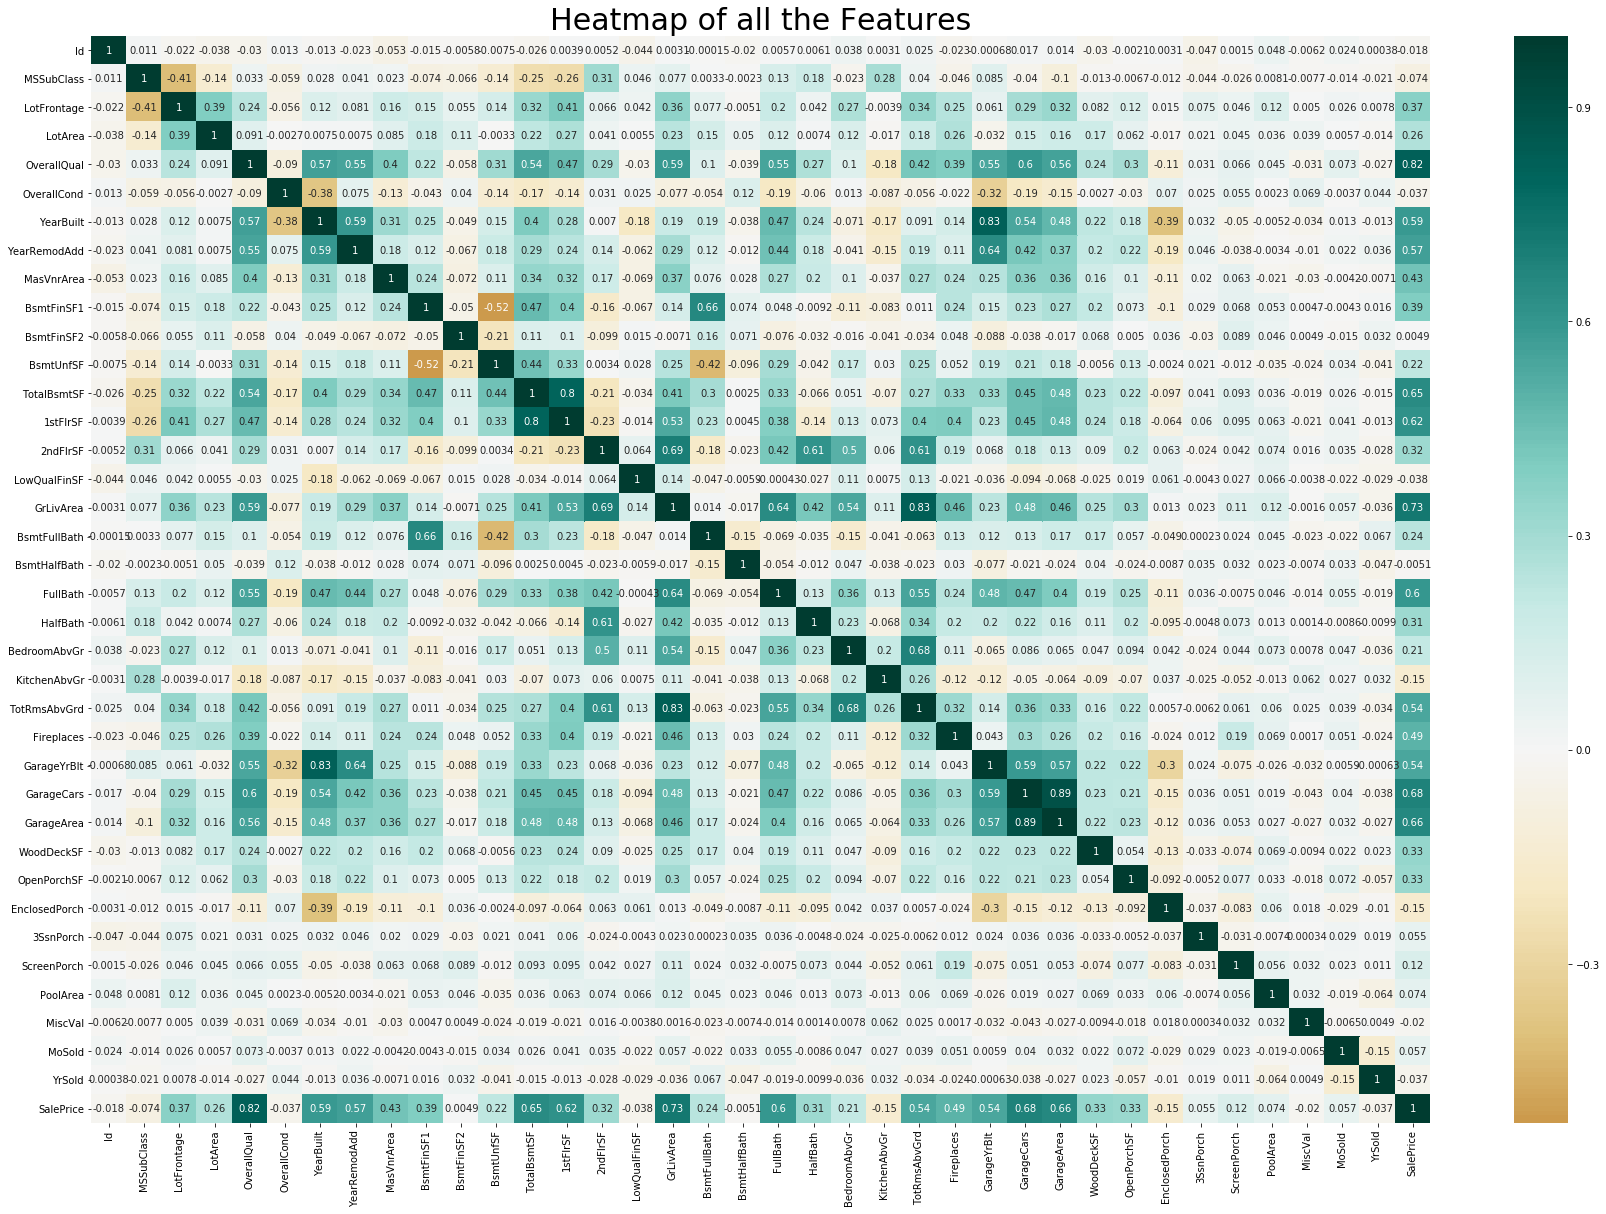

In [28]:
## Plot fig sizing. 
plt.subplots(figsize = (30,20))
## Plotting heatmap. 
sns.heatmap(train.corr(), cmap="BrBG", annot=True, center = 0, );
## Give title. 
plt.title("Heatmap of all the Features", fontsize = 30);

## Observation. 
As you can see multicollinearity still exists in various features. However, we will keep them for now for the sake of learning and lets models(e.x. Regularization models such as Lasso, Ridge) do the clean up later on. Let's go through some of the correlations that still exists. 

* There is 0.83 or 83% correlation between **GarageYrBlt** and **YearBuilt**. 
* 83% correlation between **TotRmsAbvGrd ** and **GrLivArea**. 
* 89% correlation between **GarageCars** and **GarageArea**. 
* Similarly many other features such as**BsmtUnfSF**, **FullBath** have good correlation with other independent feature but not so much with the dependent feature.

If I were using only multiple linear regression, I would be deleting these features from the dataset in order to fit a better multiple linear regression algorithms. However, we will be using many algorithms as scikit learn modules makes it easy to implement them and get the best possible model. Therefore, we will keep all the features for now. 

<h3>Resources:</h3>
<ul>
    <li><a href="https://www.statisticssolutions.com/assumptions-of-linear-regression/">Assumptions of Linear Regression</a></li>.    
</ul>

## Feature engineering

In [29]:
## saving the train and test id for later. 
train_id = train['Id']
test_id = test['Id']

## Dropping the "Id" from train and test set. 
train.drop(columns=['Id'],axis=1, inplace=True)
test.drop(columns=['Id'],axis=1, inplace=True)

In [30]:
## Getting the count of train and test. 
n_train = train.shape[0]
n_test = test.shape[0]

In [31]:
## Saving the target values in "y_train". 
y_train = train.SalePrice.values

In [32]:
## Combining train and test datasets together so that we can do all the work at once. 
all_data = pd.concat((train, test)).reset_index(drop = True)
## Dropping the target variable. 
all_data.drop(['SalePrice'], axis = 1, inplace = True)

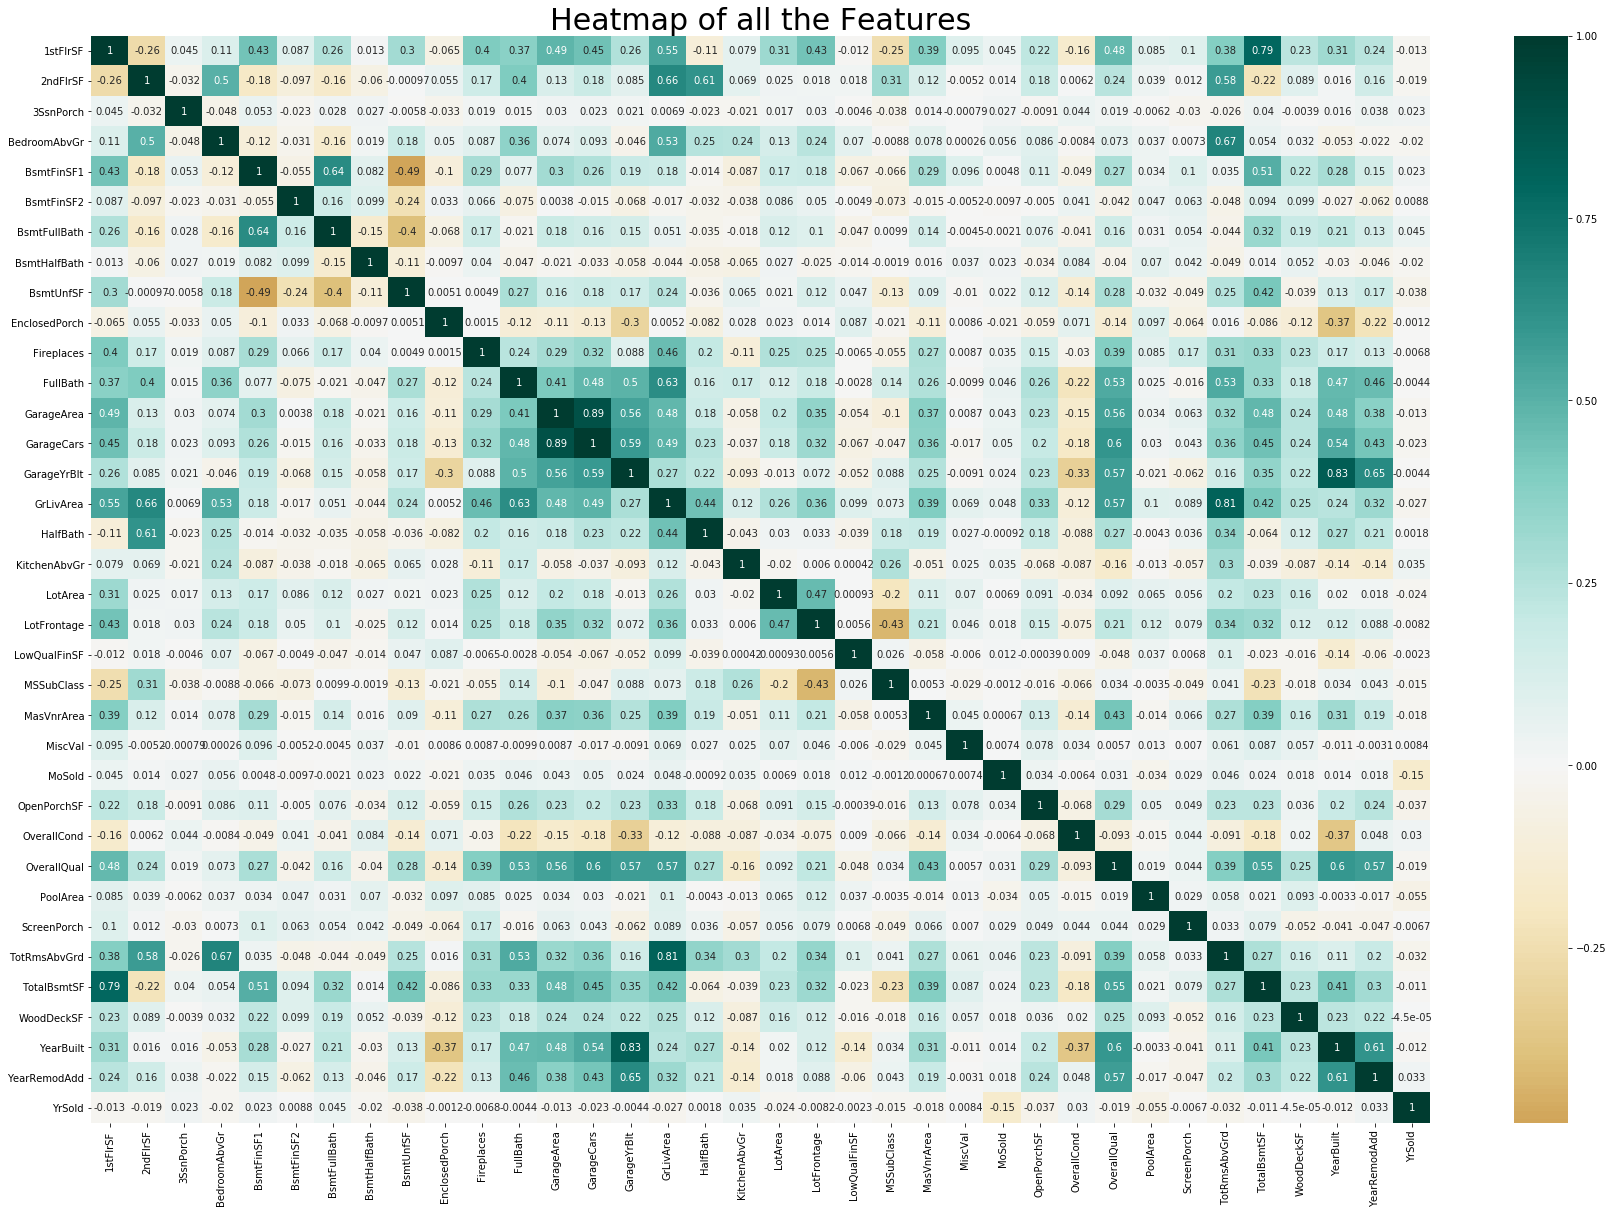

In [33]:
## Plot sizing. 
plt.subplots(figsize = (30,20))
## plotting heatmap.  
sns.heatmap(all_data.corr(), cmap="BrBG", annot=True, center = 0, );
## Set the title. 
plt.title("Heatmap of all the Features", fontsize = 30);

When we combined both train and test set, this is how the heatmap looks like.

# Dealing with Missing Values
> **Missing data in train and test data(all_data)**

In [34]:
## Creating a DataFrame with total missing values and total percentage. 
temp = pd.DataFrame(all_data.isnull().sum()[all_data.isnull().sum() != 0].sort_values(ascending = False),columns=["Total_missing"])

temp["Percent"] = round(temp.Total_missing/len(all_data)*100,2)

temp

,Total_missing,Percent
PoolQC,2908,99.69
MiscFeature,2812,96.40
Alley,2719,93.21
Fence,2346,80.43
FireplaceQu,1420,48.68
LotFrontage,486,16.66
GarageQual,159,5.45
GarageCond,159,5.45
GarageFinish,159,5.45
GarageYrBlt,159,5.45


> **Imputing Missing Values**

In [35]:
## Some missing values are intentionally left blank, for example: In the Alley feature 
## there are blank values meaning that there are no alley's in that specific house. 
missing_val_col = ["Alley", 
                   "PoolQC", 
                   "MiscFeature",
                   "Fence",
                   "FireplaceQu",
                   "GarageType",
                   "GarageFinish",
                   "GarageQual",
                   "GarageCond",
                   'BsmtQual',
                   'BsmtCond',
                   'BsmtExposure',
                   'BsmtFinType1',
                   'BsmtFinType2',
                   'MasVnrType']

for i in missing_val_col:
    all_data[i] = all_data[i].fillna('None')

In [36]:
## These features are continous variable, we used "0" to replace the null values. 
missing_val_col2 = ['BsmtFinSF1',
                    'BsmtFinSF2',
                    'BsmtUnfSF',
                    'TotalBsmtSF',
                    'BsmtFullBath', 
                    'BsmtHalfBath', 
                    'GarageYrBlt',
                    'GarageArea',
                    'GarageCars',
                    'MasVnrArea']

for i in missing_val_col2:
    all_data[i] = all_data[i].fillna(0)

**Creating New feature from other features.**

In [37]:
## Replaced all missing values in LotFrontage by imputing the median value of each neighborhood. 
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform( lambda x: x.fillna(x.median()))

In [38]:
## For these variables I have used the mode of each variable. 
missing_val_col3 = ['MSZoning','Utilities','Functional', 'SaleType','KitchenQual','Exterior2nd','Exterior1st','Electrical']

for i in missing_val_col3:
    all_data[i] = all_data[i].fillna(all_data[i].mode()[0])

In [39]:
## Checking to see if we have any more missing value left. 
temp = pd.DataFrame(all_data.isnull().sum()[all_data.isnull().sum() != 0].sort_values(ascending = False),columns=["Total_missing"])

temp["Percent"] = round(temp.Total_missing/len(all_data)*100,2)

temp

,Total_missing,Percent


We are done imputing missing values. Some of the variables are in the numerical format even though they are actually categorical variables. Let's convert them from <b>int</b> to **str**. 
#

In [40]:
## the "OverallCond" and "OverallQual" of the house. 
all_data['OverallCond'] = all_data['OverallCond'].astype(str) 
all_data['OverallQual'] = all_data['OverallQual'].astype(str)

## Important years and months that should be categorical variables not numerical. 
all_data['YearBuilt'] = all_data['YearBuilt'].astype(str)
all_data['YearRemodAdd'] = all_data['YearRemodAdd'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str) 
all_data['GarageYrBlt'] = all_data['GarageYrBlt'].astype(str)

## Zoning class are given in numerical; therefore converted to categorical variables. 
all_data['MSSubClass'] = all_data['MSSubClass'].astype(str)

In [41]:
# feture engineering a new feature "TotalFS"
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

Let's see how skewed our predictor features are.

In [42]:
## Import skew from scipy. 
from scipy.stats import skew
## Getting all the data that are not of "object" type. 
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")

skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(20)


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101
BsmtHalfBath,3.929996


In [43]:
### skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 29 skewed numerical features to Box Cox transform


## Creating Dummy Variables. 


In [44]:
## Creating dummy variable 
all_data = pd.get_dummies(all_data, drop_first=True)
all_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,YearRemodAdd_2005,YearRemodAdd_2006,YearRemodAdd_2007,YearRemodAdd_2008,YearRemodAdd_2009,YearRemodAdd_2010,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,11.692623,11.686189,0.0,1.540963,11.170327,0.0,0.730463,0.000000,7.483296,0.000000,...,0,0,0,0,0,0,0,1,0,0
1,12.792276,0.000000,0.0,1.540963,12.062832,0.0,0.000000,0.730463,8.897844,0.000000,...,0,0,0,0,0,0,1,0,0,0
2,11.892039,11.724598,0.0,1.540963,10.200343,0.0,0.730463,0.000000,9.917060,0.000000,...,0,0,0,0,0,0,0,1,0,0
3,12.013683,11.354094,0.0,1.540963,8.274266,0.0,0.730463,0.000000,10.468500,8.797736,...,0,0,0,0,0,0,0,0,0,0
4,12.510588,12.271365,0.0,1.820334,10.971129,0.0,0.730463,0.000000,10.221051,0.000000,...,0,0,0,0,0,0,0,1,0,0


**Get the modified train and test set.**

In [45]:
## Once all the pre-processing is complete, we separate train and test dataset. 
train = all_data[:n_train]
test = all_data[n_train:]

## Train_test split
 
We have separated dependent and independent features; We have separated train and test data. So, why do we still have to split our training data? If you are curious about that, I have the answer. For this competition, when we train the machine learning algorithms, we use part of the training set usually two-thirds of the train data. Once we train our algorithm using 2/3 of the train data, we start to test our algorithms using the remaining data. If the model performs well we dump our test data in the algorithms to predict and submit the competition. The code below, basically splits the train data into 4 parts, **train_x**, **test_x**, **train_y**, **test_y**.  
* **train_x** and **train_y** first used to train the algorithm. 
* then, **test_x** is used in that trained algorithms to predict **outcomes. **
* Once we get the **outcomes**, we compare it with **test_y**

By comparing the **outcome** of the model with **test_y**, we can determine whether our algorithms are performing well or not. Once we are confident about the result of our algorithm we may use the model to on the original test data and submit in the challenge. I have tried to show this whole process in the visualization chart below.

In [46]:
## Train test s
from sklearn.model_selection import train_test_split
## Train test split follows this distinguished code pattern and helps creating train and test set to build machine learning. 
train_x, test_x, train_y, test_y = train_test_split(train, y_train,test_size = .33, random_state = 0)

In [47]:
print(train_x.shape)
print(train_y.shape)
print("*"*20)
print(test_x.shape)
print(test_y.shape)

(976, 578)
(976,)
********************
(482, 578)
(482,)


# Modeling the Data
 
Before modeling each algorithm, I would like to discuss them for a better understanding. This way I would review what I know and at the same time help out the community. If you already know enough about Linear Regression, you may skip this part and go straight to the part where I fit the model. However, if you take your time to read this and other model description sections and let me know how I am doing, I would genuinely appreciate it. Let's get started. 

**Linear Regression**
<div>
    We will start with one of the most basic but useful machine learning model, **Linear Regression**. However, do not let the simplicity of this model fool you, as Linear Regression is the base some of the most complex models out there. For the sake of understanding this model, we will use parts of our data. Let's say our dataset has two features only, They are **SalePrice** and **GrLivArea**. Let's take a sample of the data and graph it.

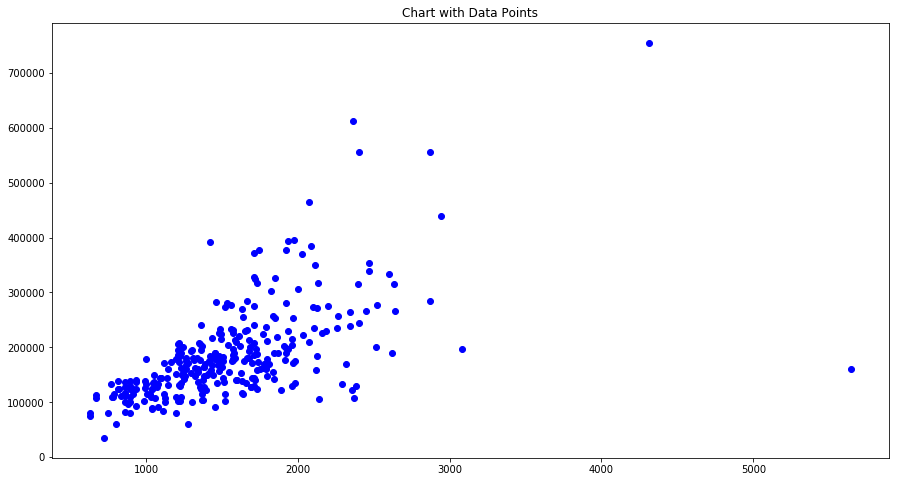

In [48]:
sample_train = previous_train.sample(300)
import seaborn as sns
plt.subplots(figsize = (15,8))
ax = plt.gca()
ax.scatter(sample_train.GrLivArea.values, sample_train.SalePrice.values, color ='b');
plt.title("Chart with Data Points");
#ax = sns.regplot(sample_train.GrLivArea.values, sample_train.SalePrice.values)
#ax.plot((sample_train.GrLivArea.values.min(),sample_train.GrLivArea.values.max()), (sample_train.SalePrice.values.mean(),sample_train.SalePrice.values.mean()), color = 'r');

As we discussed before, there is a linear relationship between SalePrice and GrLivArea. We want to know/estimate/predict the sale price of a house based on the given area, How do we do that? One naive way is to find the average of all the house prices. Let's find a line with the average of all houses and place it in the scatter plot.

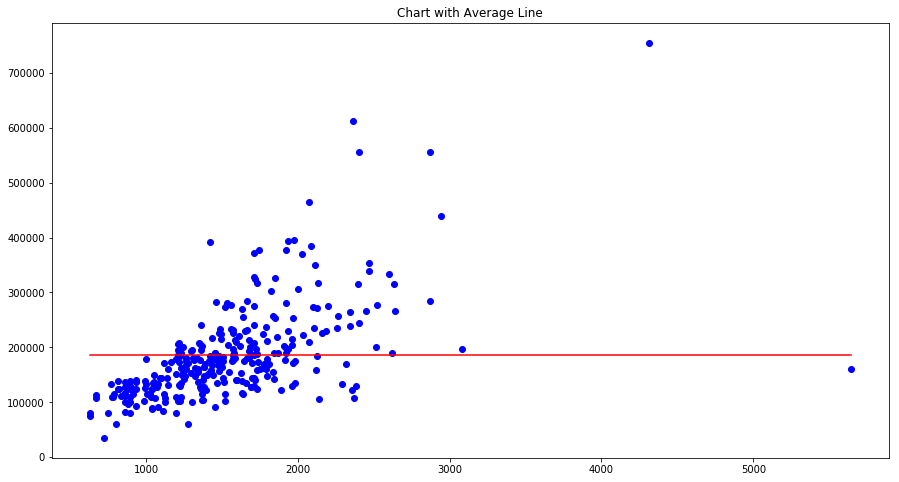

In [49]:
plt.subplots(figsize = (15,8))
ax = plt.gca()
ax.scatter(sample_train.GrLivArea.values, sample_train.SalePrice.values, color ='b');
#ax = sns.regplot(sample_train.GrLivArea.values, sample_train.SalePrice.values)
ax.plot((sample_train.GrLivArea.values.min(),sample_train.GrLivArea.values.max()), (sample_train.SalePrice.values.mean(),sample_train.SalePrice.values.mean()), color = 'r');
plt.title("Chart with Average Line");

You can tell this is not the most efficient way to estimate the price of houses. The average line clearly does not represent all the datapoint and fails to grasp the linear relationship between <b>GrLivArea & SalePrice. </b> Let's find out the Mean Squared Error(more on this later) of this line.

In [50]:
## Calculating Mean Squared Error(MSE)
sample_train['mean_sale_price'] = sample_train.SalePrice.mean()
sample_train['mse'] = np.square(sample_train.mean_sale_price - sample_train.SalePrice)
sample_train.mse.mean()
## getting mse
print("Mean Squared Error(MSE) for average line is : {}".format(sample_train.mse.mean()))

Mean Squared Error(MSE) for average line is : 7641582358.907824


We will explain more on MSE later. For now, let's just say, the closer the value of MSE is to "0", the better. Of course, it makes sense since we are talking about an error(mean squared error). We want to minimize this error. How can we do that? 

Introducing **Linear Regression**, one of the most basic and straightforward models. Many of us may have learned to show the relationship between two variable using something called "y equals mX plus b." Let's refresh our memory and call upon on that equation.

# $$ {y} = mX + b $$

Here, 
* **m** = slope of the regression line. It represents the relationship between X and y. In another word, it gives weight as to for each x(horizontal space) how much y(vertical space) we have to cover. In machine learning, we call it **coefficient**. 
* **b** = y-intercept. 
* **x** and **y** are the data points located in x_axis and y_axis respectively. 


<br/>

If you would like to know more about this equation, Please check out this [video](https://www.khanacademy.org/math/algebra/two-var-linear-equations/writing-slope-intercept-equations/v/graphs-using-slope-intercept-form). 

This slope equation gives us an exact linear relationship between X and y. This relationship is "exact" because we are given X and y beforehand and based on the value of X and y, we come up with the slope and y-intercept, which in turns determine the relationship between X and y. However, in real life, data is not that simple. Often the relationship is unknown to us, and even if we know the relationship, it may not always be exact. To fit an exact slope equation in an inexact relationship of data we introduce the term error. Let's see how mathematicians express this error with the slope equation. 

## $$ y = \beta_0 + \beta_1 x + \epsilon \\ $$

And, this is the equation for a simple linear regression.
Here,
* y = Dependent variable. This is what we are trying to estimate/solve/understand. 
* $\beta_0$ = the y-intercept, it is a constant and it represents the value of y when x is 0. 
* $\beta_1$ = Slope, Weight, Coefficient of x. This metrics is the relationship between y and x. In simple terms, it shows 1 unit increase in y changes when 1 unit increases in x. 
* $x_1$ = Independent variable ( simple linear regression ) /variables.
* $ \epsilon$ = error or residual. This error is the only part that's different/addition from the slope equation. This error exists because in real life we will never have a dataset where the regression line crosses exactly every single data point. There will be at least a good amount of points where the regression line will not be able to go through for the sake of model specifications and ** bias-variance tradeoff **(more on this later). This error term accounts for the difference of those points. So, simply speaking, an error is the difference between an original value and a predicted value(point in regression line). 

We use this function to predict the values of one dependent(target) variable based on one independent(predictor) variable. Therefore this regression is called **Simple linear regression(SLR).** If we were to write the equation regarding the sample example above it would simply look like the following equation, 
## $$ Sale Price= \beta_0 + \beta_1 (Area) + \epsilon \\ $$

This equation gives us a line that fits the data and often performs better than the average line above. But,
* How do we know that Linear regression line is actually performing better than the average line? 
* What metrics can we use to answer that? 
* How do we know if this line is even the best line(best-fit line) for the dataset? 
* If we want to get even more clear on this we may start with answering, How do we find the $\beta_0$(intercept) and  $\beta_1$(coefficient) of the equation?

<b>Finding $\beta_0$(intercept) and  $\beta_1$(coefficient):</b>

We can use the following equation to find the $\beta_0$(intercept) and  $\beta_1$(coefficient)


### $$ \hat{\beta}_1 = r_{XY} \frac{s_Y}{x_X}$$
### $$ \hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x} $$

Here...
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$
- $s_Y$ : the sample standard deviation of observed values $Y$
- $s_X$ : the sample standard deviation of observed values $X$
- $r_{XY}$ : the sample Pearson correlation coefficient between observed $X$ and $Y$

Now that we know how to find beta coefficients, let's calculate them in the coding section.

In [51]:
## Calculating the beta coefficients by hand. 
## mean of y. 
y_bar = sample_train.SalePrice.mean()
## mean of x. 
x_bar = sample_train.GrLivArea.mean()
## Std of y
std_y = sample_train.SalePrice.std()
## std of x
std_x = sample_train.GrLivArea.std()
## correlation of x and y
r_xy = sample_train.corr().loc['GrLivArea','SalePrice']
## finding beta_1
beta_1 = r_xy*(std_y/std_x)
## finding beta_0
beta_0 = y_bar - beta_1*x_bar

So, we have calculated the beta coefficients.  We can now plug them in the linear equation to get the predicted y value. Let's do that.

In [52]:
## getting y_hat, which is the predicted y values. 
sample_train['Linear_Yhat'] = beta_0 + beta_1*sample_train['GrLivArea']

Now that we have our predicted y values let's see how the predicted regression line looks in the graph.

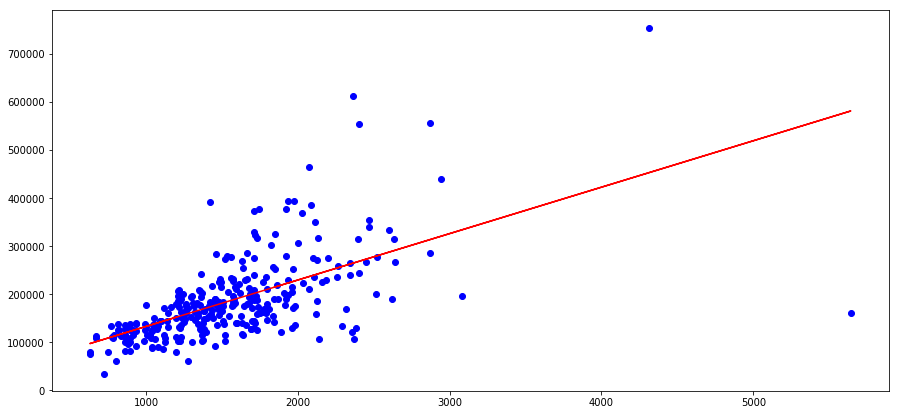

In [53]:
# create a figure
fig = plt.figure(figsize=(15,7))
# get the axis of that figure
ax = plt.gca()

# plot a scatter plot on it with our data
ax.scatter(sample_train.GrLivArea, sample_train.SalePrice, c='b')
ax.plot(sample_train['GrLivArea'], sample_train['Linear_Yhat'], color='r');

Phew!! This looks like something we can work with!! Let's find out the MSE for the regression line as well.

In [54]:
## getting mse
print("Mean Squared Error(MSE) for regression line is : {}".format(np.square(sample_train['SalePrice'] - sample_train['Linear_Yhat']).mean()))

Mean Squared Error(MSE) for regression line is : 4849432479.363617


A much-anticipated decrease in mean squared error(mse), therefore better-predicted model. The way we compare between the two predicted lines is by considering their errors. Let's put both of the model's side by side and compare the errors.

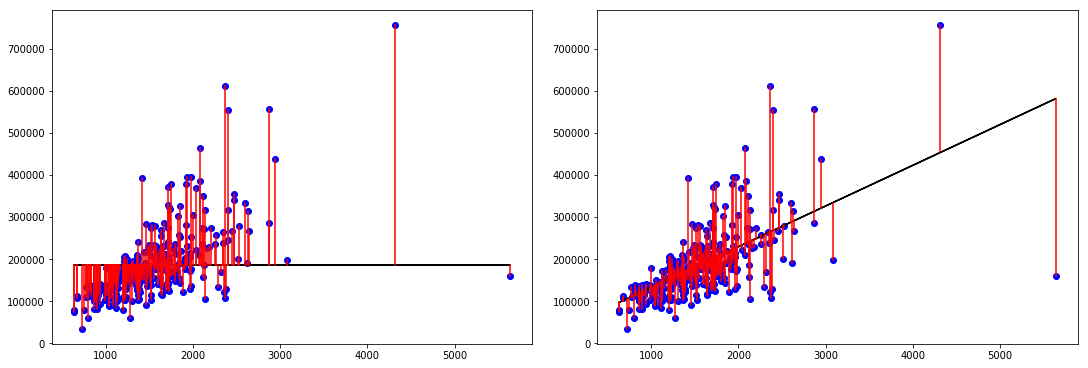

In [55]:
## Creating a customized chart. and giving in figsize and everything. 
fig = plt.figure(constrained_layout=True, figsize=(15,5))
## creating a grid of 3 cols and 3 rows. 
grid = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)
#gs = fig3.add_gridspec(3, 3)
#ax1 = fig.add_subplot(grid[row, column])
ax1 = fig.add_subplot(grid[0, :1])

# get the axis
ax1 = fig.gca()

# plot it
ax1.scatter(x=sample_train['GrLivArea'], y=sample_train['SalePrice'], c='b')
ax1.plot(sample_train['GrLivArea'], sample_train['mean_sale_price'], color='k');

# iterate over predictions
for _, row in sample_train.iterrows():
    plt.plot((row['GrLivArea'], row['GrLivArea']), (row['SalePrice'], row['mean_sale_price']), 'r-')
    
ax2 = fig.add_subplot(grid[0, 1:])

# plot it
ax2.scatter(x=sample_train['GrLivArea'], y=sample_train['SalePrice'], c='b')
ax2.plot(sample_train['GrLivArea'], sample_train['Linear_Yhat'], color='k');
# iterate over predictions
for _, row in sample_train.iterrows():
    plt.plot((row['GrLivArea'], row['GrLivArea']), (row['SalePrice'], row['Linear_Yhat']), 'r-')

On the two charts above, the left one is the average line, and the right one is the regression line. <font color="blue"><b>Blue</b></font> dots are observed data points and <font color="red"><b>red</b></font> lines are error distance from each observed data points to model predicted line. As you can see the regression line reduces much of the errors; therefore, performs much better than average line. 

Now, we need to introduce a couple of metrics that will help us compare and contrast models. One of them is mean squared error(mse) which we used while comparing two models. Some of the other metrics are...


* Residual Sum of the Squared(RSS) or Sum of the Squared Error(SSE)
* Coefficient of the determination ($R^2$)

Let's go through each one of them. 
 
 ### Residual Sum of the Squared(RSS)/Sum of the Squared Error(SSE): 
These two are the same metrics and known in different names. Similar to MSE, RSS determines how far away the observed values are from the regression line. However, the calculation is different. RSS is calculated by squaring each error/residual of the data points and then adding them together, While MSE is calculated by taking the difference between the mean of the target variable from each data points and then squaring them.   In better models, both RSS and MSE scores are closer to **"0"**. Let's look that the equation for finding RSS/SSE


### $$RSS = \sum_{i=1}^n (Y_i - \hat{Y}_i)^2 $$

Here, 
* We find the difference of each observed($Y_i$) value and predicted($\hat{Y}_i$) value. Here predicted value is basically what the regression line suggests for that specific independent variable.
* We squared the difference for each data point. 
* We add them all together. Hence, the name **Residual Sum of squares(RSS)**.

A visualization would make things much more clear. 
 ![](http://blog.hackerearth.com/wp-content/uploads/2016/12/anat.png)
 
Here the blue line is the <font color="blue"><b>regression line</b></font> and the black dot is the observed value. So, RSS describes the distance between the black dot and the <font color="blue"><b>regression line</b></font>. The closer the regression line to the black dot(observed value), the better the model is. 

And, we already know ...
## $$ \hat{y} = \beta_0 + \beta_1 x + \epsilon \\ $$

Let's plug in( $\hat{Y}$  ) equation in the RSS equation and we get...
$$RSS = \sum_{i=1}^n \left(y_i - \left(\beta_0 + \sum_{j=1}^p\beta_j x_j\right)\right)^2 $$

This equation is also known as the loss function. Here, **"loss"** is the sum of squared residuals(More on this later). 

### Mean Squared Error
Now let's get back to our naive prediction and calculate the **Mean squared error**, which is also a metrics similar to RSS, helps us determine how well our model is performing. In **Mean squared error** we subtract the mean of y from each y datapoints and square them. 

### Coefficient of the Determination($R^2$)

![](https://www.machinelearningplus.com/wp-content/uploads/2017/03/R_Squared_Computation.png)

<h3>Resources about Errors: </h3>
<ul>
    <li><a href="https://heartbeat.fritz.ai/5-regression-loss-functions-all-machine-learners-should-know-4fb140e9d4b0">5 Regression Loss Functions All Machine Learners Should Know</a></li>
</ul>

If you would like to improve this result further, you can think about the assumptions of the linear regressions and apply them as we have discussed earlier in this kernel. 


Similar to **Simple Linear Regression**, there is an equation for multiple independent variables to predict a target variable. The equation is as follows.

## $$ \hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n $$

Here, We can already know parts of the equation, and from there we can keep adding new features and their coefficients with the equations. Quite simple, isn't it. 

We can have a target variable predicted by multiple independent variables using this equation. Therefore this equation is called **Multiple Linear Regression.** Let's try this regression in the housing dataset.

In [56]:
## importing necessary models.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score

## Call in the LinearRegression object
lin_reg = LinearRegression(normalize=True, n_jobs=-1)
## fit train and test data. 
lin_reg.fit(train_x, train_y)
## Predict test data. 
y_pred = lin_reg.predict(test_x)

In [57]:
## get average squared error(MSE) by comparing predicted values with real values. 
print ('%.2f'%mean_squared_error(test_y, y_pred))

1556072551715752116224.00


## Using cross validation.

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold
lin_reg = LinearRegression()
cv = KFold(shuffle=True, random_state=2, n_splits=10)
scores = cross_val_score(lin_reg, train,y_train,cv = cv, scoring = 'neg_mean_absolute_error')

In [59]:
print ('%.8f'%scores.mean())

-38958296.80819788


 This way of model fitting above is probably the simplest way to construct a machine learning model. However, Let's dive deep into some more complex regression. 

### Regularization Models
Among all the machine learning models, some of my favorites are **Regression models**. What makes regression model even more effective is its ability of *regularizing*. The term "regularizing" stands for models ability **to structurally prevent overfitting by imposing a penalty on the coefficients.** 


There are three types of regularizations. 
* **Ridge**
* **Lasso**
* **Elastic Net**

These regularization methods work by penalizing **the magnitude of the coefficients of features** and at the same time **minimizing the error between the predicted value and actual observed values**.  This minimization becomes a balance between the error (the difference between the predicted value and observed value) and the size of the coefficients. The only difference between Ridge and Lasso is **the way they penalize the coefficients.** Elastic Net is the combination of these two. **Elastic Net** adds both the sum of the squares errors and the absolute value of the squared error. To get more in-depth of it, let us review the least squared loss function. 

**Ordinary least squared** loss function minimizes the residual sum of the square(RSS) to fit the data:

### $$ \text{minimize:}\; RSS = \sum_{i=1}^n (y_i - \hat{y}_i)^2 = \sum_{i=1}^n \left(y_i - \left(\beta_0 + \sum_{j=1}^p\beta_j x_j\right)\right)^2 $$

Let's review this equation once again, Here: 
* $y_i$ is the observed value. 
* $\hat{y}_i$ is the predicted value. 
* The error = $y_i$ - $\hat{y}_i$
* The square of the error = $(y_i - \hat{y}_i)^2$
* the sum of the square of the error = $\sum_{i=1}^n (y_i - \hat{y}_i)^2$, that's the equation on the left. 
* the only difference between left sides equation vs. the right sides one above is the replacement of $\hat{y}_i$, it is replaced by $\left(\beta_0 + \sum_{j=1}^p\beta_j x_j\right)$, which simply follow's the slope equation, y = mx+b, where, 
* $\beta_0$ is the intercept. 
* **$\beta_j$ is the coefficient of the feature($x_j$).**

Let's describe the effect of regularization and then we will learn how we can use loss function in Ridge.
* One of the benefits of regularization is that it deals with **multicollinearity** well, especially Ridge method. Lasso deals with **multicollinearity** more brutally by penalizing related coefficients and force them to become zero, hence removing them. However, **Lasso** is well suited for redundant variables. 
 
***
<div>
    
 #### Ridge:
Ridge regression adds penalty equivalent to the square of the magnitude of the coefficients. This penalty is added to the least square loss function above and looks like this...

### $$ \text{minimize:}\; RSS+Ridge = \sum_{i=1}^n \left(y_i - \left(\beta_0 + \sum_{j=1}^p\beta_j x_j\right)\right)^2 + \lambda_2\sum_{j=1}^p \beta_j^2$$

Here, 
* $\lambda_2$ is constant; a regularization parameter. It is also known as $\alpha$. The higher the value of this constant the more the impact in the loss function. 
    * When $\lambda_2$ is 0, the loss funciton becomes same as simple linear regression. 
    * When $\lambda_2$ is $\infty$, the coefficients become 0
    * When $\lambda_2$ is between  0 and $\infty$(0<$\lambda_2$<$\infty$), The $\lambda_2$ parameter will decide the miagnitude given to the coefficients. The coefficients will be somewhere between 0 and ones for simple linear regression. 
* $\sum_{j=1}^p \beta_j^2$, is the squared sum of all coefficients. 

Now that we know every nitty-gritty details about this equation, let's use it for science, but before that a couple of things to remember. 
* It is essential to standardize the predictor variables before constructing the models. 
* It is important to check for multicollinearity,

In [60]:
## Importing Ridge. 
from sklearn.linear_model import Ridge
## Assiging different sets of alpha values to explore which can be the best fit for the model. 
alpha_ridge = [-3,-2,-1,1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1,1.5, 2,3,4, 5, 10, 20, 30, 40]
temp_rss = {}
temp_mse = {}
for i in alpha_ridge:
    ## Assigin each model. 
    ridge = Ridge(alpha= i, normalize=True)
    ## fit the model. 
    ridge.fit(train_x, train_y)
    ## Predicting the target value based on "Test_x"
    y_pred = ridge.predict(test_x)

    mse = mean_squared_error(test_y, y_pred)
    rss = sum((y_pred-test_y)**2)
    temp_mse[i] = mse
    temp_rss[i] = rss

In [61]:
temp_mse

{-3: 4.700823444412014,
 -2: 33.88693992110375,
 -1: 2.9279531377976578,
 1e-15: 0.039178905687125905,
 1e-10: 0.03853766907900984,
 1e-08: 0.03853670678950883,
 0.0001: 0.03775852385154498,
 0.001: 0.03497256156697421,
 0.01: 0.026805300504053328,
 1: 0.016878591939960576,
 1.5: 0.01830993806390015,
 2: 0.019810161214761934,
 3: 0.02288084539833173,
 4: 0.025974942152649214,
 5: 0.029049767143015017,
 10: 0.043485812401253265,
 20: 0.06624305436814905,
 30: 0.0823642360115961,
 40: 0.09412262959115003}

In [62]:
temp_rss

{-3: 2265.796900206591,
 -2: 16333.505041972017,
 -1: 1411.2734124184715,
 1e-15: 18.88423254119469,
 1e-10: 18.57515649608275,
 1e-08: 18.574692672543268,
 0.0001: 18.19960849644468,
 0.001: 16.856774675281574,
 0.01: 12.920154842953718,
 1: 8.135481315060996,
 1.5: 8.825390146799872,
 2: 9.548497705515253,
 3: 11.028567481995891,
 4: 12.51992211757692,
 5: 14.001987762933238,
 10: 20.960161577404065,
 20: 31.929152205447846,
 30: 39.699561757589365,
 40: 45.36710746293429}

### Lasso:
Lasso adds penalty equivalent to the absolute value of the sum of coefficients. This penalty is added to the least square loss function and replaces the squared sum of coefficients from Ridge. 

## $$ \text{minimize:}\; RSS + Lasso = \sum_{i=1}^n \left(y_i - \left(\beta_0 + \sum_{j=1}^p\beta_j x_j\right)\right)^2 + \lambda_1\sum_{j=1}^p |\beta_j|$$

Here, 
* $\lambda_2$ is a constant similar to the Ridge function. 
* $\sum_{j=1}^p |\beta_j|$ is the absolute sum of the coefficients.

In [63]:
from sklearn.linear_model import Lasso
temp_rss = {}
temp_mse = {}
for i in alpha_ridge:
    ## Assigin each model. 
    lasso_reg = Lasso(alpha= i, normalize=True)
    ## fit the model. 
    lasso_reg.fit(train_x, train_y)
    ## Predicting the target value based on "Test_x"
    y_pred = lasso_reg.predict(test_x)

    mse = mean_squared_error(test_y, y_pred)
    rss = sum((y_pred-test_y)**2)
    temp_mse[i] = mse
    temp_rss[i] = rss

In [64]:
temp_mse

{-3: 124175532539.52191,
 -2: 55189126769.56206,
 -1: 13797282589.734764,
 1e-15: 0.038560220840307295,
 1e-10: 0.038559693752287225,
 1e-08: 0.03850687710496448,
 0.0001: 0.013942790341996773,
 0.001: 0.023673743330743555,
 0.01: 0.1569279384121436,
 1: 0.16467335518379542,
 1.5: 0.16467335518379542,
 2: 0.16467335518379542,
 3: 0.16467335518379542,
 4: 0.16467335518379542,
 5: 0.16467335518379542,
 10: 0.16467335518379542,
 20: 0.16467335518379542,
 30: 0.16467335518379542,
 40: 0.16467335518379542}

### Elastic Net: 
Elastic Net is the combination of both Ridge and Lasso. It adds both the sum of squared coefficients and the absolute sum of the coefficients with the ordinary least square function. Let's look at the function. 

### $$ \text{minimize:}\; RSS + Ridge + Lasso = \sum_{i=1}^n \left(y_i - \left(\beta_0 + \sum_{j=1}^p\beta_j x_j\right)\right)^2 + \lambda_1\sum_{j=1}^p |\beta_j| + \lambda_2\sum_{j=1}^p \beta_j^2$$

This equation is pretty self-explanatory if you have been following this kernel so far.

## Credits. 
* To GA where I started my data science journey.
* To Kaggle community for inspiring me over and over again. 
* Credits to

***
If you like to discuss any other projects or just have a chat about data science topics, I'll be more than happy to connect with you on:

<b><a href="https://www.linkedin.com/in/masumrumi/">LinkedIn</a></b>


**LinkedIn:** https://www.linkedin.com/in/masumrumi/ 

**My Website:** http://masumrumi.com/ 

*** This kernel will always be a work in progress. I will incorporate new concepts of data science as I comprehend them with each update. If you have any idea/suggestions about this notebook, please let me know. Any feedback about further improvements would be genuinely appreciated.***
***
### If you have come this far, Congratulations!!

### If this notebook helped you in any way or you liked it, please upvote and/or leave a comment!! :) 